# Project 3: Reddit API & Classification (Dating Apps)

<p align="center">
    <img src="../images/cmbbumblelogo.png" width, height: 50px>
</p>

# Problem Statement

The proliferation of online dating apps since 2013 has revolutionsed the <a href='https://www.businessofapps.com/data/dating-app-market/'>online dating industry</a> , where users are spoilt for choice with over almost 20 different apps to choose from.  As part of a consultancy firm offering data-driven analysis and insights to such dating companies, we identify the most frequently-
used words among app users, so that we can determine the most talked-about features for each app, and provide recommendations to our stakeholders to increase their market share. To kickstart our analysis, we turn to one of the most popular social media platforms, Reddit. 

With over <a href='https://sg.oberlo.com/blog/reddit-statistics'>430 million monthly active users worldwide</a>, Reddit houses one of the largest social networking communities and is home to a massive 2.2 million subreddits, of which about 130,000 are currently active. In this project, we narrow down our search to subreddits of 2 popular dating apps - Coffee Meets Bagel (<a href='https://www.reddit.com/r/coffeemeetsbagel'>/r/coffeemeetsbagel</a>) and Bumble(<a href='https://www.reddit.com/r/bumble'>/r/bumble</a>). Using Natural Language Processing, we select and train 5 classification models to determine which model has the best performance in classifying posts into their subreddits based on the text the posts contain. The classification metrics - accuracy, recall, precision and specificity - will be used to evaluate the best model's performance.


# Executive Summary 

Reddit has exploded in popularity since its inception in 2005 and has remained one of the most popular social media communities,  with 58% of its users between the  <a href='https://websitebuilder.org/blog/reddit-statistics/'>ages of 18-29</a> . This is well-explained by the fact that the advent of social media coincided with internet usage gaining widespread adoption among millenials (roughly born between 1982 - 1996). Furthermore, the mobile applications (apps) revolution accompanied the rapid increase in mobile phone ownership due to their accessibility, convenience and general quality-of-life improvements. 

The online dating scene eventually rose to prominence and naturally, subreddits for all the dating apps were created where redditors gathered to seek advice and share their experiences. 2 of the most widely-used and text-heavy apps (Tinder was skipped as it was full of images) - Coffee Meets Bagel (CMB) and Bumble - were picked to explore in of this classification analysis.

We began by scraping the 2 subreddits for at least 750 posts to account for the elimination of non-useable posts (images only, no text, etc.). Tinder was an initial pick but as seen from the scraping results below, CMB and Bumble were the next 2 subreddits in line with a significantly higher proportion of useable posts. 

Scraping Results (Useable posts as a %) 
- Tinder 129/750 = 17% (Not used) 
- Cmb 691/750 = 92% (Used)
- Bumble 501/987 = 51% (Used)

After extensive data cleaning and text preprocesing through the removal of stop words (common words that are not meaningful in our analyses) and combining the title and text of each post, we explore the word frequencies from each subreddit through the use of word clouds and bar charts. Several keywords stood from the respective subreddits: 

- CMB: "discover", "suggested", "bean" 
- Bumble: "woman", "dating", 

The modelling selection process involved building pipelines consisting of either the CountVectorizer or Term frequency-Inverse document frequency vectorizer, and a classification model. Hyperparameter tuning was then done to obtain the best training and cross-validated scores for each pipeline. From the tuning results, it was determined that the best model is the Multinomial Naive Bayes model via comparisons with the cross-validated score and the accuracy score on the test (validation) data set, which were 77.0 and 73.6% respectively. 

The results of the classification metrics are as such: 
- Accuracy - 73.6% 
- Misclassification rate - 26.4%
- Recall - 76.8% 
- Precision - 77.4% 
- Specificity - 69.3% 

The accuracy score of 73.6% here is not extremely high, suggesting that posts made in the /r/bumble and /r/coffeemeetsbagel subreddits do not differ significantly.

High recall scores show that the model performs better at classifying posts belonging to /r/coffeemeetsbagel compared to classifying posts belonging to /r/bumble. A misclassification analysis was conducted by looking through the misclassified posts to make sense of the 26.4% misclassification rate. A common trend was discovered from the contents of the posts which consisted of users seeking advice on relationships, sharing their dating experiences on the apps, or ranting about scammers. It is understandable that these topics appear in both subreddits as both groups of users are in similar situations and thus, would share similar experiences. 

Word importance was also explored by determining the top coefficients of words in the respective subreddit. Words which influenced the classification model the most from CMB include 'liked', 'discover' and 'suggested, while that of Bumble was rather inconclusive with 265 words with the joint-highest coefficient. Closer inspection of these words did reveal several keywords unique to the Bumble app, such as 'bee', 'beeline', 'bi', 'binary' and 'non binary'. However, they did not appear frequently enough for our model to pick up their importance. 

These keywords are important because they are features unique to the respective apps, and it is evident CMB has more differentiating factors compared to Bumble, and that Bumble does not have features which are prominent or unique enough. 



# Contents 
- [2. Data Cleaning](#2.-Data-Cleaning)
- [3. EDA](#3.-EDA)
- [4. Classification Modelling](#4.-Classification-Modelling)
- [5. Model Selection](#5.-Model-Selection)
- [6. Evaluations & Recommendations](#6.-Evaluations-&-Recommendations)

### Import Libraries 

In [69]:
# import statements 
import pandas as pd
import random
import string
import nltk
import regex as re
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
pd.pandas.set_option('display.max_columns', None)

## 2. Data Cleaning 

In this section, we will use our text processing function to remove all non-alphabetic characters, convert them to lower case and lemmatize the remaining words.

In [71]:
df_cmb = pd.read_csv('../datasets/cmb_cleaned')
df_bumble = pd.read_csv('../datasets/bumble_cleaned')

In [72]:
from nltk.corpus import stopwords # Import the stopword list
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sir_A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sir_A\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Stopwords
In addition to the imported stopwords, addtional stop words are also included 

In [73]:
stop_words = set(stopwords.words('english'))  
additional_stop_words = ['match', 'chat', 'like', 'app', 'message', 'pic', 'text', 
                         'cmb', 'coffeemeetsbagel', 'bumble', 'coffee', 'meets', 'bagel',
                        'guy', 'girl', 'people', 'title_selftext', 'dtype', 'doe', 'p', 'ca', 'wa', 'cr', 'profile',
                        'one', 'see', 'get', 'day', 'date', 'someone', 'time', 'know', 'account', 'would', 'first', 'back',
                        'ha']
# 
stop_words = stop_words.union(additional_stop_words)

In [74]:
from nltk.stem import WordNetLemmatizer
global stop_words 

def text_processing(raw_text):
    # Function to convert raw text to a string of words
    # 1. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # 2. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 3. Lemmatize 
    lemmatizer = WordNetLemmatizer()
    words_lem = [lemmatizer.lemmatize(i) for i in words]
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stopwords to a set.
    stops = stop_words
    
    # 5. Remove stopwords.
    meaningful_words = [w for w in words_lem if w not in stops]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [75]:
df_cmb['title_selftext'] = df_cmb['title_selftext'].map(text_processing)
df_cmb['title_selftext'].head()

0    seeing suggested new user gonna lie kind frust...
1    discover tab always skews type southern califo...
2    f found turn rather hi everyone rather long th...
3    serious relationship want find serious relatio...
4    despite preference suggested full way young ye...
Name: title_selftext, dtype: object

In [76]:
df_bumble['title_selftext'] = df_bumble['title_selftext'].map(text_processing)
df_bumble['title_selftext'].head()

0    weekly critique please post critique request a...
1    ghosted much better come along amp x b end som...
2    biggest red flag seen saw referenced timothy r...
3    matched yo f great surreal good true exchanged...
4    old approached park dog park today big dog sid...
Name: title_selftext, dtype: object

In [77]:
# join title and selftext to a single string
cmb_words = ' '.join(df_cmb['title_selftext'])
cmb_words = " ".join([word for word in cmb_words.split()])

In [78]:
bumble_words = ' '.join(df_bumble['title_selftext'])
bumble_words = " ".join([word for word in bumble_words.split()])

In [79]:
df_combined = pd.concat([df_cmb, df_bumble])
df_combined.head()

,subreddit,title_selftext
0,coffeemeetsbagel,seeing suggested new user gonna lie kind frust...
1,coffeemeetsbagel,discover tab always skews type southern califo...
2,coffeemeetsbagel,f found turn rather hi everyone rather long th...
3,coffeemeetsbagel,serious relationship want find serious relatio...
4,coffeemeetsbagel,despite preference suggested full way young ye...


In [80]:
df_combined.shape

(1191, 2)

In [81]:
# Assign 1 to CMB, 0 to Bumble
df_combined['subreddit'] = df_combined['subreddit'].map(lambda x: 1 if x == 'coffeemeetsbagel' else 0)
df_combined.head()

,subreddit,title_selftext
0,1,seeing suggested new user gonna lie kind frust...
1,1,discover tab always skews type southern califo...
2,1,f found turn rather hi everyone rather long th...
3,1,serious relationship want find serious relatio...
4,1,despite preference suggested full way young ye...


In [82]:
df_combined.tail()

,subreddit,title_selftext
496,0,love language everyone life language
497,0,got train everyone opinion stock price prediction
498,0,question dating apps decide ghost instead unma...
499,0,without planning meet started texting jan rd a...
500,0,anyone used new night feature yet fun worthwhi...


## 3. EDA 

After processing the text, the next step is to identify which words have the highest occurrences within the subreddits, and which words contribute the highest coefficients. 

Words clouds will be used as our visual representation of word frequencies within each of the subreddits. 

#### Word Clouds 

In [83]:
!pip install wordcloud
from wordcloud import WordCloud
from PIL import Image

#### Coffee Meets Bagel Word Cloud 

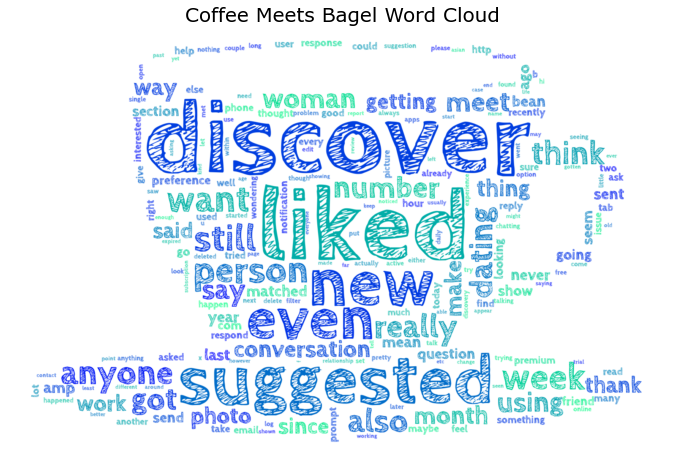

In [84]:
plt.figure(figsize=(12,12))
wc_cmb = WordCloud(background_color="white", max_words=200,font_path='../fonts/CabinSketch-Bold.ttf',
               stopwords=stop_words, max_font_size=100,
               random_state=42, width=500, height=500, scale=3, colormap='winter',
               mask = np.array(Image.open('../images/coffee2.jpg')),
               collocations=False).generate(cmb_words)
                   
# wc_cmb.generate(cmb_words)
plt.imshow(wc_cmb, interpolation="bilinear")
plt.axis('off')
plt.title("Coffee Meets Bagel Word Cloud", font="Verdana", size=20, color='black')
plt.show()

#### Bumble Word Cloud

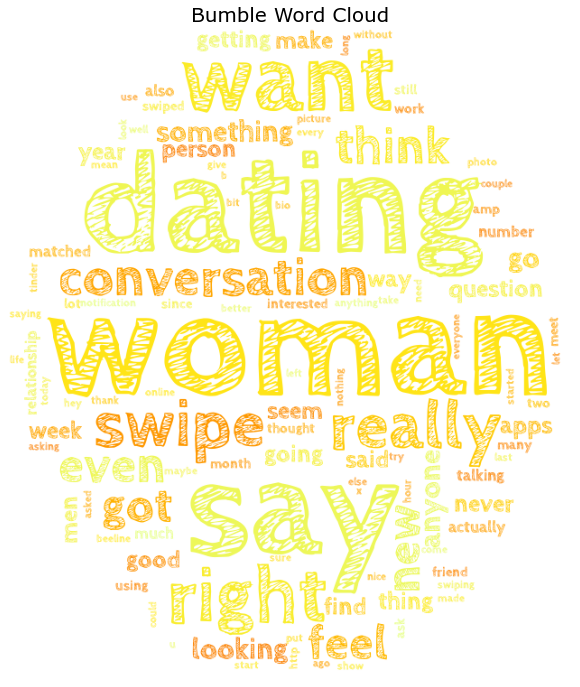

In [85]:
plt.figure(figsize=(12,12))
wc_bumble = WordCloud(background_color="white", max_words=200, font_path='../fonts/CabinSketch-Bold.ttf',
                    stopwords=stop_words, max_font_size=100,
                    random_state=42, scale=3, colormap='Wistia',
                    mask = np.array(Image.open('../images/beehive.jfif')),
                    collocations=False,)
wc_bumble.generate(bumble_words)
plt.imshow(wc_bumble)
plt.title("Bumble Word Cloud", font="Verdana", size=20, color='black')
plt.axis('off')
plt.show()

#### Wordcloud Analysis

The word cloud helps us visualize which words appear more frequently and their importance in the respective subreddits. 

For coffeemeetsbagel, the biggest and boldest words seen are 'discover', 'suggested' and 'liked', whereas for bumble, the words are 'woman', 'dating' and 'say'. 

From the wordcloud and industry knowledge, we can tell that coffeemeetsbagel has special features that are highly specific to the app, and this reveals itself through their high occurrence in the reddit posts. 

#### Word Bar Plots

To dive deeper into the actual frequency of words, we run a simple CountVectorizer and TF-IDFVectorizer for the words in each subreddit and plot the top 20 most common words.  

In [86]:
cmb_df = df_combined[df_combined['subreddit'] == 1]['title_selftext']
bumble_df = df_combined[df_combined['subreddit'] == 0]['title_selftext']

##### CountVectorizer 

In [87]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv_cmb_simple = CountVectorizer(stop_words=stop_words)
cmb_words_cv = cv_cmb_simple.fit_transform(cmb_df.values)

cv_bumble_simple = CountVectorizer(stop_words=stop_words)
bumble_words_cv = cv_bumble_simple.fit_transform(bumble_df.values)

In [88]:
cmb_words_df = pd.DataFrame(cmb_words_cv.todense(), columns=cv_cmb_simple.get_feature_names()).sum(axis=0)
bumble_words_df = pd.DataFrame(bumble_words_cv.todense(), columns=cv_bumble_simple.get_feature_names()).sum(axis=0)

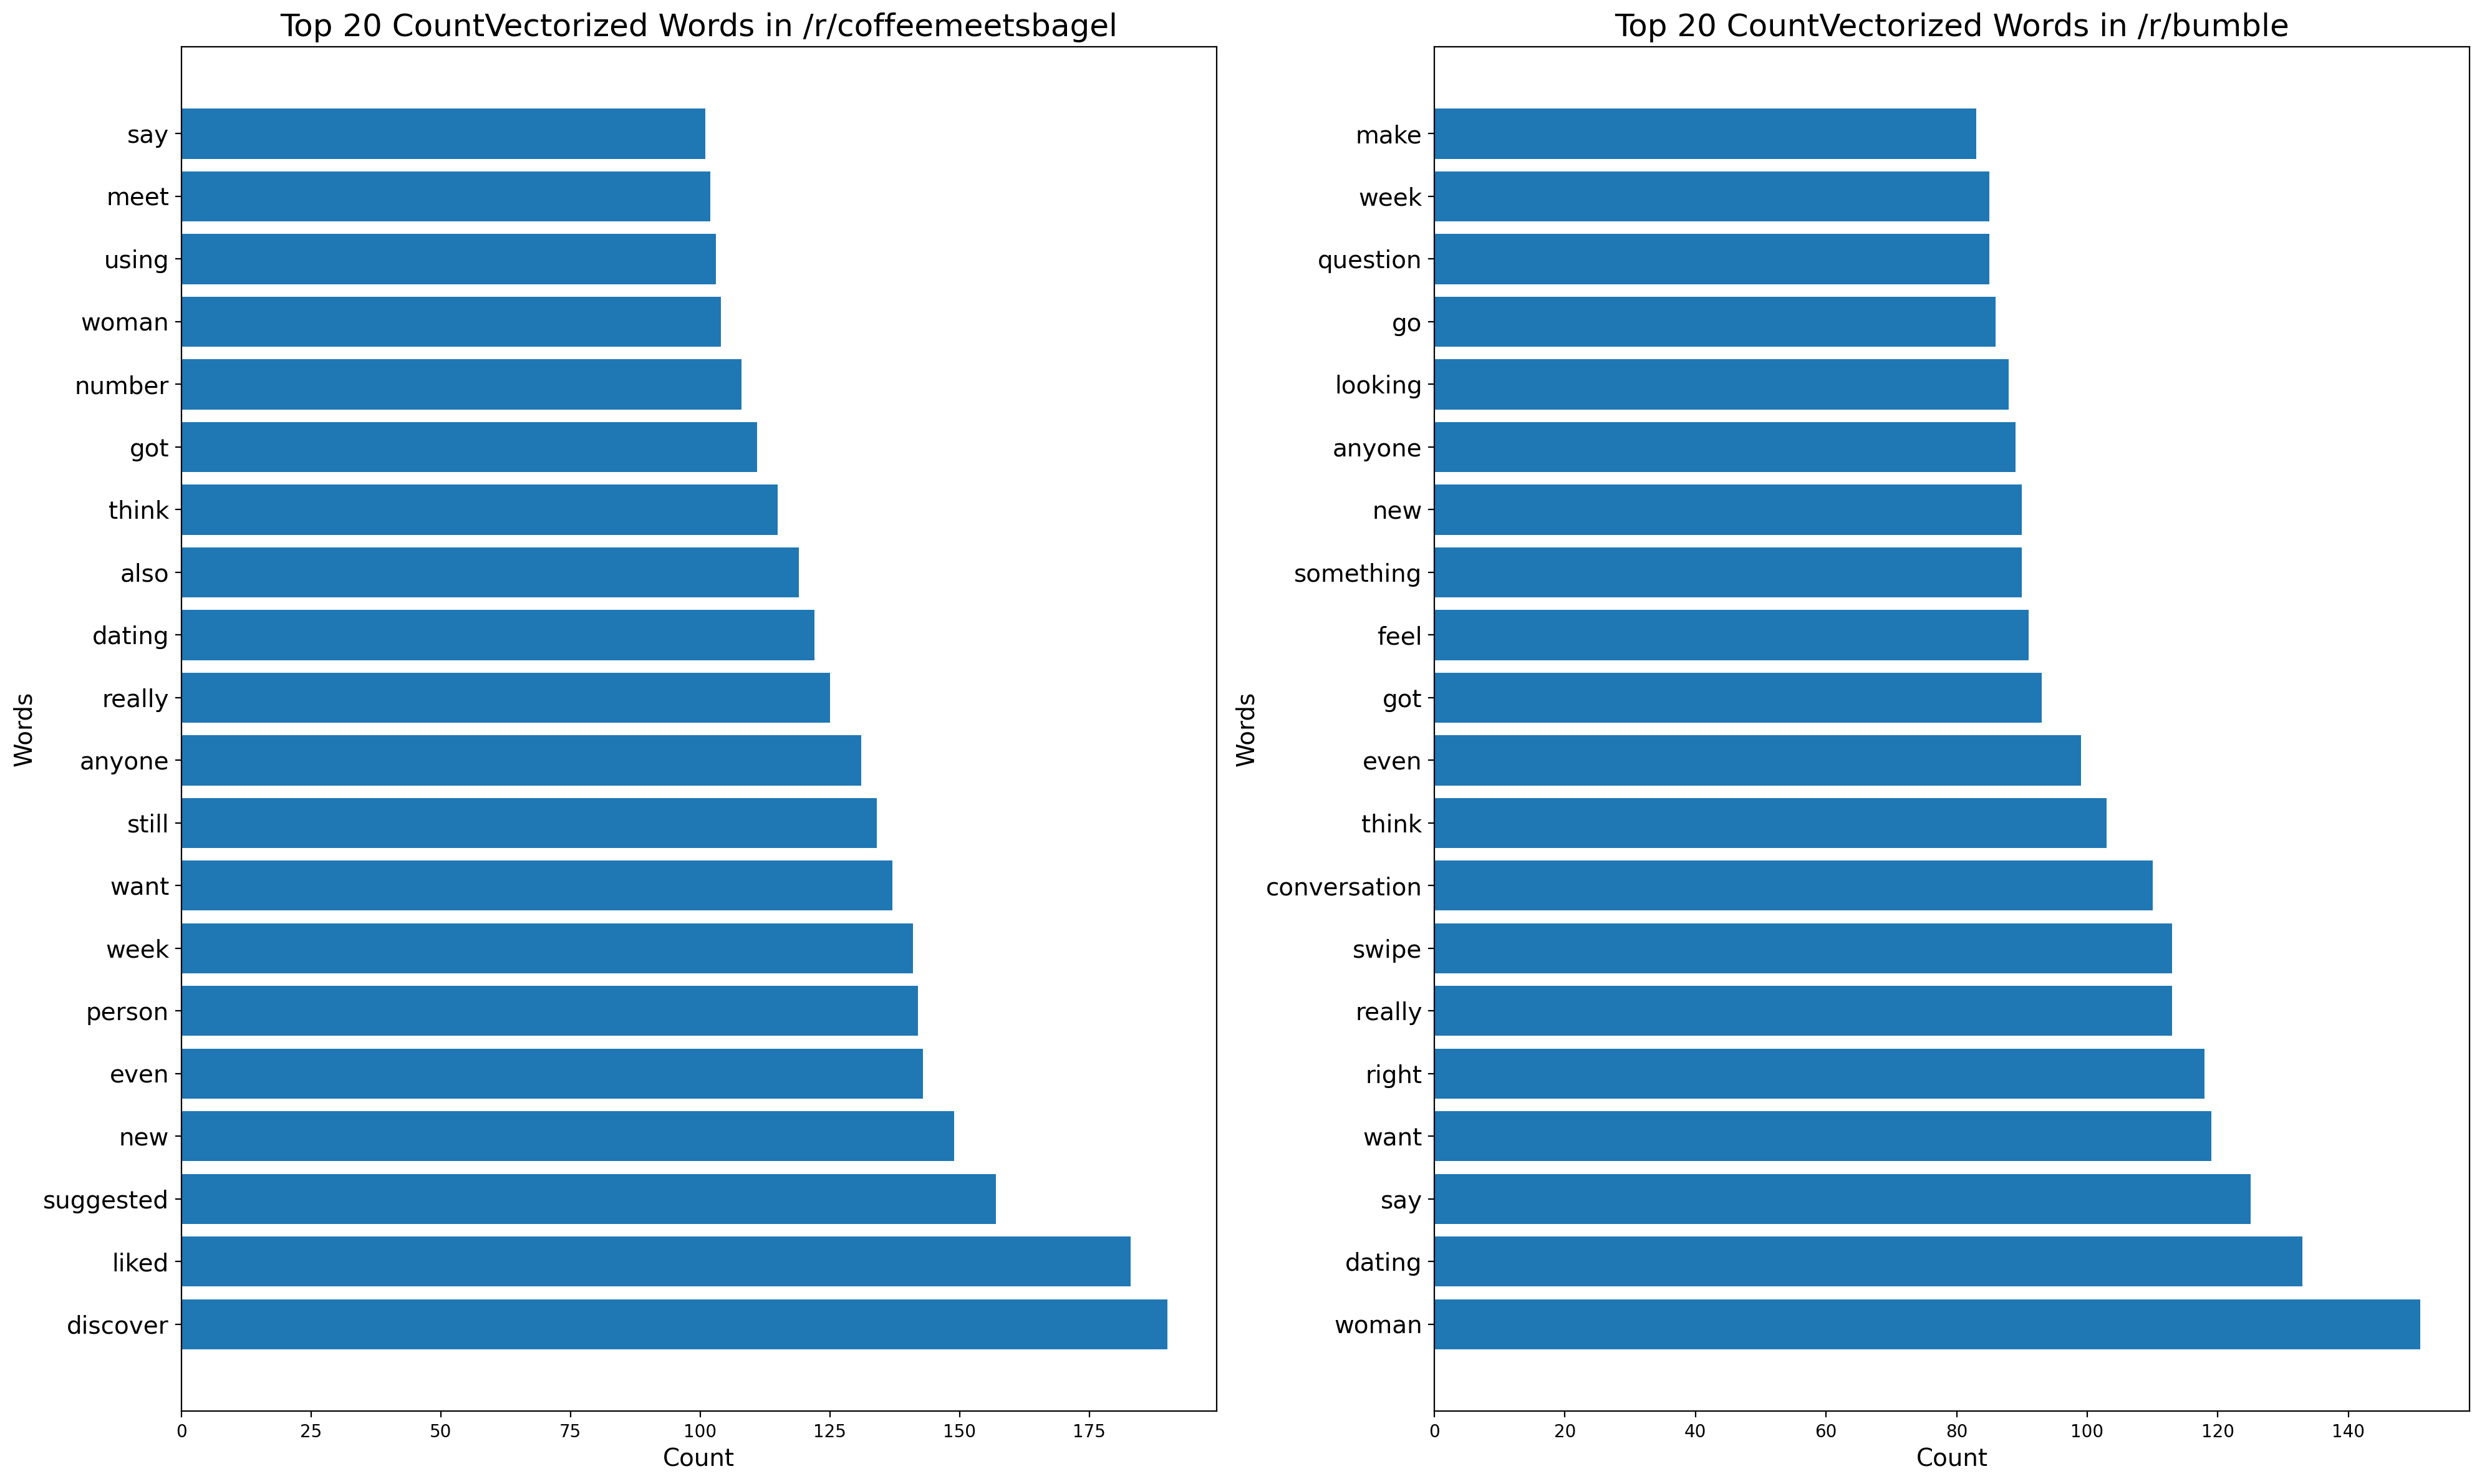

In [89]:
fig = plt.figure(figsize=(20,12), dpi=200)
count=0
titles = ["Top 20 CountVectorized Words in /r/coffeemeetsbagel", "Top 20 CountVectorized Words in /r/bumble"]

for thread in [cmb_words_df, bumble_words_df]:
    count +=1
    ax = fig.add_subplot(1, 2, count)    
    plt.barh(thread.sort_values(ascending=False)[:20].index, width= thread.sort_values(ascending=False)[:20].values)
    plt.ylabel("Words", fontsize=14)
    plt.xlabel("Count", fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.title(titles[count-1], fontsize=18)

The most frequent words appearing in each thread after running a simple CountVectorize is consistent with the words in the wordcloud. 

- coffeemeetsbagel: 'Discover', 'liked' and 'suggested' are the top 3 words 
- bumble: 'woman' is the most frequent by a margin of ~20 with 'dating' coming in second place. 

Further inspection reveals many words that are common across both subreddits, eg. "feel", "say", "think". As these subreddits are catered towards those seeking/giving advice in the dating scene, it would be expected that users would ask questions like "what should I say?" or make statements in the form of "I feel" or "I think". 

##### TF-IDF Vectorizer

In [92]:
tf_cmb_simple = TfidfVectorizer(stop_words=stop_words)
cmb_words_tf = tf_cmb_simple.fit_transform(cmb_df.values)

tf_bumble_simple = TfidfVectorizer(stop_words=stop_words)
bumble_words_tf = tf_bumble_simple.fit_transform(bumble_df.values)

In [93]:
cmb_tf_words_df = pd.DataFrame(cmb_words_tf.todense(), columns=tf_cmb_simple.get_feature_names()).sum(axis=0)
bumble_tf_words_df = pd.DataFrame(bumble_words_tf.todense(), columns=tf_bumble_simple.get_feature_names()).sum(axis=0)

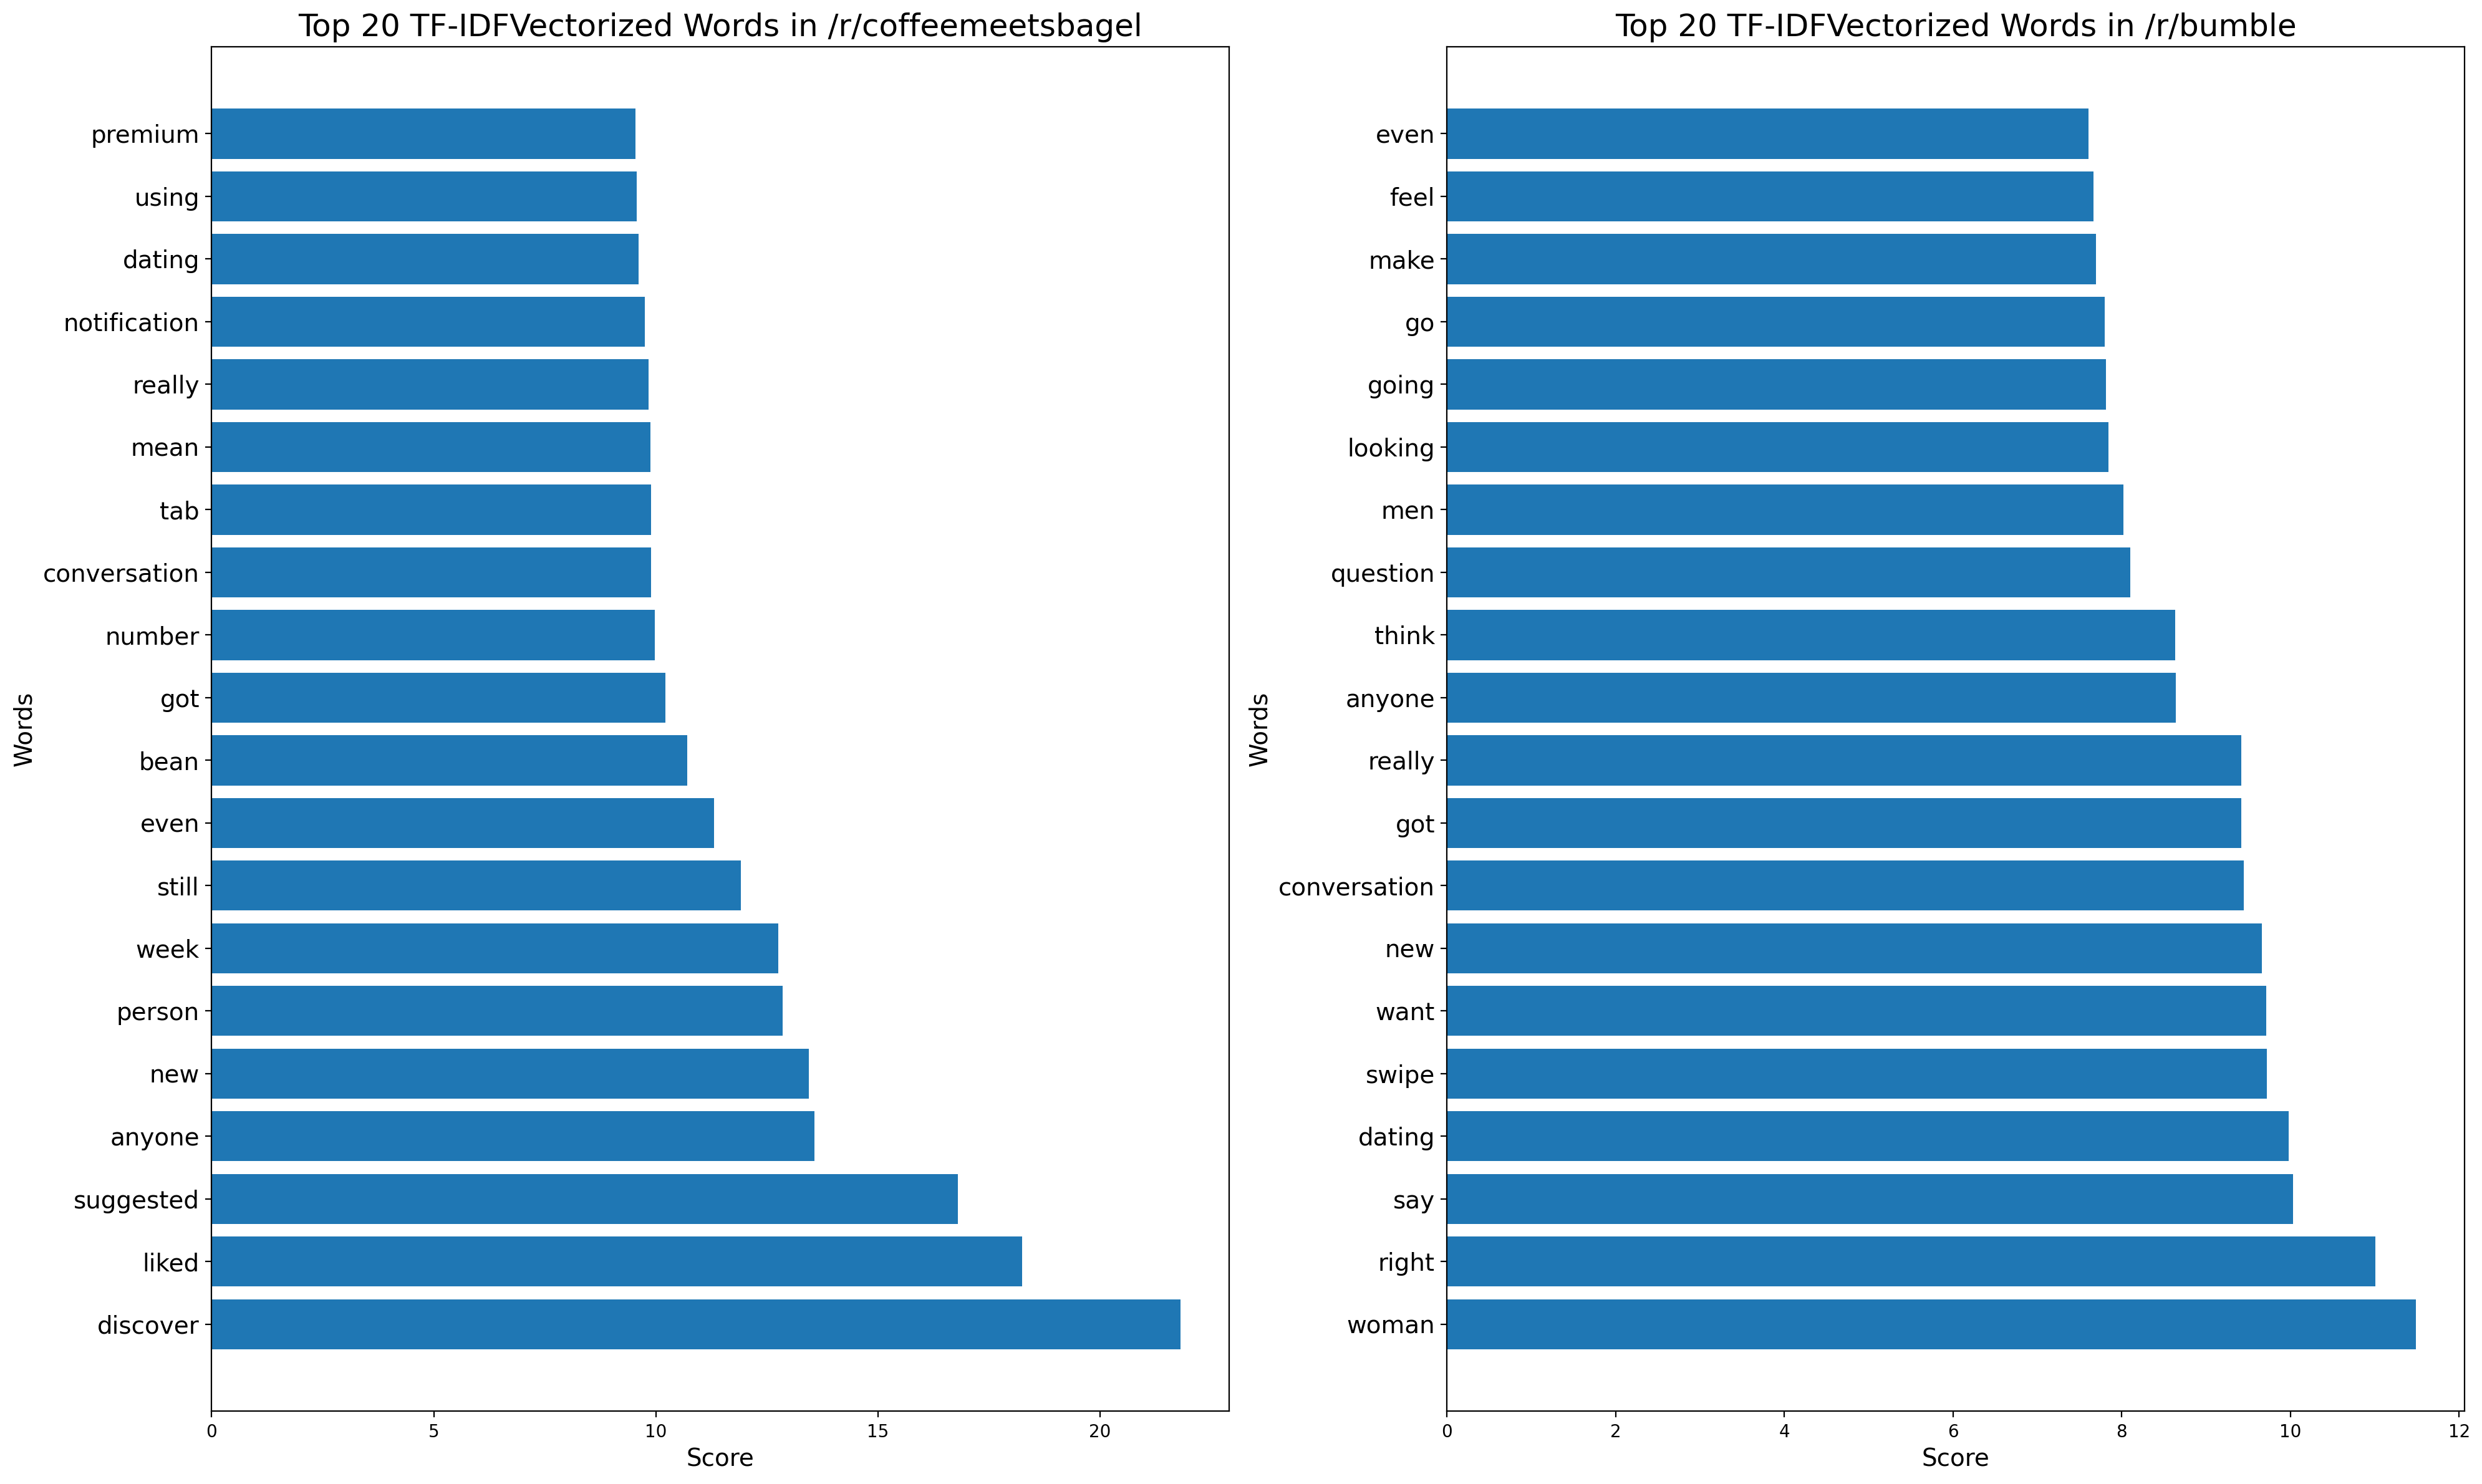

In [94]:
fig = plt.figure(figsize=(20,12), dpi=200)
count=0
titles = ["Top 20 TF-IDFVectorized Words in /r/coffeemeetsbagel", "Top 20 TF-IDFVectorized Words in /r/bumble"]

for thread in [cmb_tf_words_df, bumble_tf_words_df]:
    count +=1
    ax = fig.add_subplot(1, 2, count)    
    plt.barh(thread.sort_values(ascending=False)[:20].index, width= thread.sort_values(ascending=False)[:20].values)
    plt.ylabel("Words", fontsize=14)
    plt.xlabel("Score", fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.title(titles[count-1], fontsize=18)

To measure the importance of the words in the subreddits, we use the term frequency-inverse document frequency vectorizer. Thus, words that occur more often in 1 document but don't occur in many documents contain more predictive power. 

The highest scoring words for coffeemeetsbagel are consistent with the most frequently occuring words ('discover', 'liked', 'suggested') when using CountVectorizer. These 3 words are actually special features specific to the app, and it is expected that some users may make posts that relate specifically to them. Thus, it is understandable that not all posts will contain these words, but if they do, then there is a tendency for them to occur more frequently. 

"Woman" and "right" are the highest scoring words for bumble. It is possible that "woman" has both the highest score and word frequency by virtue of the fact that <a href="https://blog.btrax.com/japanese-dating-culture/">over 70% of its users are male</a>. The word "right" may seem meaningless out of context but it is likely a reference to the term "swipe right". In fact, when using CountVectorizer, the terms "swipe" and "right" are the 5th and 6th most occurring words respectively. 

With this preliminary data analysis, we have a better understanding of the parameters to tune in the next section on running our models. 

## 4. Classification Modelling 


### 4.1. Preprocessing

In [97]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [98]:
X = df_combined['title_selftext']
y = df_combined['subreddit']

In [99]:
y.value_counts(normalize=True)

1    0.579345
0    0.420655
Name: subreddit, dtype: float64

In [100]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=42, stratify=y)

### 4.2 Baseline Accuracy

#### Base Model Testing

In [101]:
vectorizer = [CountVectorizer(), TfidfVectorizer()]
models = [LogisticRegression(), KNeighborsClassifier(), MultinomialNB(), 
          RandomForestClassifier(), SVC()]
model_names = ["Logistic Regression", "K Nearest Neighbors", "Multinomial Naive Bayes", "Random Forest", "Support Vector Machine"]
train_scores = []
test_scores = []

for vect in vectorizer: 
    for model, name in zip(models, model_names): 
        X_train_transformed = vect.fit_transform(X_train)
        X_test_transformed = vect.transform(X_test)
        model.fit(X_train_transformed, y_train)
        train_scores.append(cross_val_score(model, X_train_transformed, y_train, cv=5).mean())
        test_scores.append(model.score(X_test_transformed, y_test))

In [102]:
cv_train_scores = train_scores[:int(len(train_scores)/2)]
cv_test_scores = test_scores[:int(len(train_scores)/2)]

tf_train_scores = train_scores[int(len(train_scores)/2):]
tf_test_scores = test_scores[int(len(train_scores)/2):]

In [103]:
pd.DataFrame(data=np.array([cv_train_scores, cv_test_scores, tf_train_scores, tf_test_scores]).T, index=model_names ,columns=['cv_train', 'cv_test', 'tf_train', 'tf_test'])

,cv_train,cv_test,tf_train,tf_test
Logistic Regression,0.740299,0.713198,0.717704,0.708122
K Nearest Neighbors,0.628538,0.611675,0.712634,0.725888
Multinomial Naive Bayes,0.762854,0.756345,0.698868,0.695431
Random Forest,0.720244,0.700508,0.711486,0.680203
Support Vector Machine,0.718962,0.725888,0.723970,0.741117


Based on the results above, it is inconclusive whether CrossVectorize or TF-IDFVectorizer, or which of the models is the better performer in terms of accuracy.

Thus we will combined hyperparameter tuning with GridSearchCV for all the models to determine which is the most appropriate for classifying the subreddits. 

### 4.3 Hyperparameter Tuning with GridSearchCV

- Logistic Regression 
- Naive Bayes
- Random Forest
- k-Nearest Neighbors
- Support Vector Machine

#### 4.3.1 Logistic Regression Model  

Tuning with both L1 and L2 penalties

##### L1 Penalty (CVEC)

In [104]:
lr1_model = Pipeline([
        ('cvec', CountVectorizer(stop_words=stop_words)),
        ('lr', LogisticRegression())
    ])

logr_pipe_params_1 = {
    'cvec__max_features': [2000, 3000, 4000,],
    'cvec__min_df': [2, 3], 
    'cvec__max_df': [0.9, 0.95], 
    'cvec__ngram_range': [(1,1), (1,2)], 
    'lr__C' : [1, .05],
    'lr__penalty' : ['l1'],
    'lr__solver': ['liblinear']
}

In [105]:
lr1_gs = GridSearchCV(lr1_model, 
                    param_grid=logr_pipe_params_1,
                    verbose=1)
lr1_gs.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   12.4s finished


GridSearchCV(estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'account',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'app',
                          

In [106]:
lr1_best = lr1_gs.best_estimator_
print(f"Best Log Reg Model (CVEC) with L1 Penalty:\nParameters:{lr1_gs.best_params_}\
    \nTrain Score: {lr1_gs.score(X_train, y_train)}\
    \nCross-validated score: {lr1_gs.best_score_}\
    \nTest Score: {lr1_best.score(X_test, y_test)}")

Best Log Reg Model (CVEC) with L1 Penalty:
Parameters:{'cvec__max_df': 0.9, 'cvec__max_features': 2000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'lr__C': 1, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}    
Train Score: 0.9799247176913425    
Cross-validated score: 0.710188679245283    
Test Score: 0.7055837563451777


In [107]:
best_models_cv_stats = [['cv_best_params', 'cv_best_train_score', 'cv_best_cross_val_score', 'cv_best_test_score'],
                       [lr1_gs.best_params_, lr1_gs.score(X_train, y_train), lr1_gs.best_score_, lr1_best.score(X_test, y_test)]]
best_models_cv_stats

[['cv_best_params',
  'cv_best_train_score',
  'cv_best_cross_val_score',
  'cv_best_test_score'],
 [{'cvec__max_df': 0.9,
   'cvec__max_features': 2000,
   'cvec__min_df': 2,
   'cvec__ngram_range': (1, 1),
   'lr__C': 1,
   'lr__penalty': 'l1',
   'lr__solver': 'liblinear'},
  0.9799247176913425,
  0.710188679245283,
  0.7055837563451777]]

##### L1 Penalty (TF-IDF)

In [108]:
lr1_tvec_model = Pipeline([
        ('tvec', TfidfVectorizer(stop_words=stop_words)),
        ('lr', LogisticRegression())
    ])

logr_pipe_params_tvec = {
    'tvec__max_features': [2000, 3000, 4000,],
    'tvec__min_df': [2, 3], 
    'tvec__max_df': [0.9, 0.95], 
    'tvec__ngram_range': [(1,1), (1,2)], 
    'lr__C' : [1, .05],
    'lr__penalty' : ['l1'],
    'lr__solver': ['liblinear']
}

lr1_tvec_gs = GridSearchCV(lr1_tvec_model, 
                    param_grid=logr_pipe_params_tvec,
                    verbose=1)
lr1_tvec_gs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   12.3s finished


GridSearchCV(estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'account',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'app',
                          

In [109]:
lr1_tvec_best = lr1_tvec_gs.best_estimator_
print(f"Best Log Reg Model (TF-IDF) with L1 Penalty:\nParameters:{lr1_tvec_gs.best_params_}\
    \nTrain Score: {lr1_tvec_gs.score(X_train, y_train)}\
    \nCross-validated score: {lr1_tvec_gs.best_score_}\
    \nTest Score: {lr1_tvec_best.score(X_test, y_test)}")

Best Log Reg Model (TF-IDF) with L1 Penalty:
Parameters:{'lr__C': 1, 'lr__penalty': 'l1', 'lr__solver': 'liblinear', 'tvec__max_df': 0.9, 'tvec__max_features': 2000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 1)}    
Train Score: 0.7741530740276035    
Cross-validated score: 0.6951179245283019    
Test Score: 0.6802030456852792


In [110]:
best_models_tvec_stats = [['tf_best_params', 'tf_best_train_score', 'tf_best_cross_val_score', 'tf_best_test_score'],
    [lr1_tvec_gs.best_params_, lr1_tvec_gs.score(X_train, y_train), lr1_tvec_gs.best_score_, lr1_tvec_best.score(X_test, y_test)]]

##### L2 Penalty (CVEC)

In [111]:
lr2_model = Pipeline([
        ('cvec', CountVectorizer(stop_words=stop_words)),
        ('lr', LogisticRegression())
    ])

logr_pipe_params_2 = {
    'cvec__max_features': [2000, 3000, 4000,],
    'cvec__min_df': [2, 3], 
    'cvec__max_df': [0.9, 0.95], 
    'cvec__ngram_range': [(1,1), (1,2)], 
    'lr__C' : [1, .05],
    'lr__penalty' : ['l2'],
    'lr__solver': ['lbfgs']
}

lr2_gs = GridSearchCV(lr1_model, 
                    param_grid=logr_pipe_params_2,
                    verbose=1)
lr2_gs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   14.6s finished


GridSearchCV(estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'account',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'app',
                          

In [112]:
lr2_best = lr2_gs.best_estimator_

print(f"Best Log Reg Model (CVEC) with L2 Penalty:\nParameters:{lr2_gs.best_params_}\
    \nTrain Score: {lr2_gs.score(X_train, y_train)}\
    \nCross-validated score: {lr2_gs.best_score_}\
    \nTest Score: {lr2_best.score(X_test, y_test)}")

Best Log Reg Model (CVEC) with L2 Penalty:
Parameters:{'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'lr__C': 1, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}    
Train Score: 0.9962358845671268    
Cross-validated score: 0.7403301886792453    
Test Score: 0.7030456852791879


In [113]:
best_models_cv_stats.append([lr2_gs.best_params_, lr2_gs.score(X_train, y_train), lr2_gs.best_score_, lr2_best.score(X_test, y_test)])

##### L2 Penalty (TF-IDF)

In [114]:
lr2_tvec_model = Pipeline([
        ('tvec', TfidfVectorizer(stop_words=stop_words)),
        ('lr', LogisticRegression())
    ])

logr_pipe_params_tvec_2 = {
    'tvec__max_features': [2000, 3000, 4000,],
    'tvec__min_df': [2, 3], 
    'tvec__max_df': [0.9, 0.95], 
    'tvec__ngram_range': [(1,1), (1,2)], 
    'lr__C' : [1, .05],
    'lr__penalty' : ['l2'],
    'lr__solver': ['lbfgs']
}

lr2_tvec_gs = GridSearchCV(lr2_tvec_model, 
                    param_grid=logr_pipe_params_tvec_2,
                    verbose=1)
lr2_tvec_gs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   13.4s finished


GridSearchCV(estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'account',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'app',
                          

In [115]:
lr2_tvec_best = lr2_tvec_gs.best_estimator_
print(f"Best Log Reg Model (TVEC) with L2 Penalty:\nParameters:{lr2_tvec_gs.best_params_}\
    \nTrain Score: {lr2_tvec_gs.score(X_train, y_train)}\
    \nCross-validated score: {lr2_tvec_gs.best_score_}\
    \nTest Score: {lr2_tvec_best.score(X_test, y_test)}")

Best Log Reg Model (TVEC) with L2 Penalty:
Parameters:{'lr__C': 1, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs', 'tvec__max_df': 0.9, 'tvec__max_features': 2000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 1)}    
Train Score: 0.9284818067754078    
Cross-validated score: 0.7327672955974842    
Test Score: 0.7182741116751269


In [116]:
best_models_tvec_stats.append([lr2_tvec_gs.best_params_, lr2_tvec_gs.score(X_train, y_train), lr2_tvec_gs.best_score_, lr2_tvec_best.score(X_test, y_test)])

#### 4.3.2 Naive Bayes Model

##### NB CVEC

In [117]:
nb_model = Pipeline([
    ('cvec', CountVectorizer(stop_words=stop_words)),
    ('nb', MultinomialNB())
])

nb_params = {
    'cvec__max_features': [2000, 3000, 4000,],
    'cvec__min_df': [2, 3], 
    'cvec__max_df': [0.9, 0.95], 
    'cvec__ngram_range': [(1,1), (1,2)], 
    'nb__alpha': [0.5, 0.75, 1.0]
}

In [118]:
nb_gs = GridSearchCV(nb_model,
                    param_grid=nb_params,
                    verbose=1,)
nb_gs.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   17.8s finished


GridSearchCV(estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'account',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'app',
                          

In [119]:
nb_gs.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=3000, min_df=2,
                                 ngram_range=(1, 2),
                                 stop_words={'a', 'about', 'above', 'account',
                                             'after', 'again', 'against', 'ain',
                                             'all', 'am', 'an', 'and', 'any',
                                             'app', 'are', 'aren', "aren't",
                                             'as', 'at', 'back', 'bagel', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'bumble', ...})),
                ('nb', MultinomialNB(alpha=0.5))])

In [120]:
nb_best = nb_gs.best_estimator_

print(f"Best NB Model (CVEC):\nParameters:{nb_gs.best_params_}\
    \nTrain Score: {nb_gs.score(X_train, y_train)}\
    \nCross-validated score: {nb_gs.best_score_}\
    \nTest Score: {nb_best.score(X_test, y_test)}")

Best NB Model (CVEC):
Parameters:{'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'nb__alpha': 0.5}    
Train Score: 0.9535759096612296    
Cross-validated score: 0.7703930817610063    
Test Score: 0.7360406091370558


In [121]:
nb_cv_best = [nb_gs.best_params_, nb_gs.score(X_train, y_train), nb_gs.best_score_, nb_best.score(X_test, y_test)]
best_models_cv_stats.append(nb_cv_best)

The naive bayes model has a slightly better performing training test score of 0.752 and while its test score only differs slightly, indicating that it is not as overfit. 

#####  NB TF-IDF

In [122]:
nb_tvec_model = Pipeline([
    ('tvec', TfidfVectorizer(stop_words=stop_words)),
    ('nb', MultinomialNB())
])

nb_params_tvec = {
    'tvec__max_features': [2000, 3000, 4000,],
    'tvec__min_df': [2, 3], 
    'tvec__max_df': [0.9, 0.95], 
    'tvec__ngram_range': [(1,1), (1,2)], 
    'nb__alpha': [0.25, 0.5, 0.75, 1]
}

nb_tvec_gs = GridSearchCV(nb_tvec_model,
                    param_grid=nb_params_tvec,
                    verbose=1,)
nb_tvec_gs.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   24.5s finished


GridSearchCV(estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'account',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'app',
                          

In [123]:
nb_tvec_best = nb_tvec_gs.best_estimator_

print(f"Best NB Model (TF-IDF):\nParameters:{nb_tvec_gs.best_params_}\
    \nTrain Score: {nb_tvec_gs.score(X_train, y_train)}\
    \nCross-validated score: {nb_tvec_gs.best_score_}\
    \nTest Score: {nb_tvec_best.score(X_test, y_test)}")

Best NB Model (TF-IDF):
Parameters:{'nb__alpha': 0.5, 'tvec__max_df': 0.9, 'tvec__max_features': 2000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 2)}    
Train Score: 0.9397741530740276    
Cross-validated score: 0.7565801886792453    
Test Score: 0.7157360406091371


In [124]:
best_nb_tvec = [nb_tvec_gs.best_params_, nb_tvec_gs.score(X_train, y_train), nb_tvec_gs.best_score_, nb_tvec_best.score(X_test, y_test)]
best_models_tvec_stats.append(best_nb_tvec)

#### 4.3.3 Random Forest 

##### RF (CVEC)

In [125]:
rf_model = Pipeline([
    ('cvec', CountVectorizer(stop_words=stop_words)),
    ('rf', RandomForestClassifier())
])

rf_params = {'cvec__max_features': [2000, 3000, 4000,],
             'cvec__min_df': [2, 3], 
             'cvec__max_df': [0.9, 0.95], 
             'cvec__ngram_range': [(1,1), (1,2)], 
             'rf__n_estimators': [100, 150, 200],
             'rf__max_depth': [None, 1, 2, 3,],
        }

In [126]:
rf_gs = GridSearchCV(rf_model,
                     param_grid=rf_params,
                     verbose=1,                      
)

rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  5.4min finished


GridSearchCV(estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'account',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'app',
                          

In [127]:
rf_best = rf_gs.best_estimator_

print(f"Best RF Model (CVEC):\nParameters:{rf_gs.best_params_}\
    \nTrain Score: {rf_gs.score(X_train, y_train)}\
    \nCross-validated score: {rf_gs.best_score_}\
    \nTest Score: {rf_best.score(X_test, y_test)}")

Best RF Model (CVEC):
Parameters:{'cvec__max_df': 0.95, 'cvec__max_features': 3000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'rf__max_depth': None, 'rf__n_estimators': 100}    
Train Score: 1.0    
Cross-validated score: 0.7353301886792453    
Test Score: 0.700507614213198


In [128]:
rf_cv_best = [rf_gs.best_params_, rf_gs.score(X_train, y_train), rf_gs.best_score_, rf_best.score(X_test, y_test)]
best_models_cv_stats.append(rf_cv_best)

##### RF (TF-IDF)

In [129]:
rf_tvec_model = Pipeline([
    ('tvec', TfidfVectorizer(stop_words=stop_words)),
    ('rf', RandomForestClassifier())
])

rf_params_tvec = {
    'tvec__max_features': [2000, 3000, 4000,],
    'tvec__min_df': [2, 3], 
    'tvec__max_df': [0.9, 0.95], 
    'tvec__ngram_range': [(1,1), (1,2)], 
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [None, 1, 2, 3,],
}

rf_tvec_gs = GridSearchCV(rf_tvec_model,
                    param_grid=rf_params_tvec,
                    verbose=1,)
rf_tvec_gs.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  5.6min finished


GridSearchCV(estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'account',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'app',
                          

In [130]:
rf_tvec_best = rf_tvec_gs.best_estimator_

print(f"Best RF Model (TF-IDF):\nParameters:{rf_tvec_gs.best_params_}\
    \nTrain Score: {rf_tvec_gs.score(X_train, y_train)}\
    \nCross-validated score: {rf_tvec_gs.best_score_}\
    \nTest Score: {rf_tvec_best.score(X_test, y_test)}")

Best RF Model (TF-IDF):
Parameters:{'rf__max_depth': None, 'rf__n_estimators': 100, 'tvec__max_df': 0.95, 'tvec__max_features': 2000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 2)}    
Train Score: 1.0    
Cross-validated score: 0.7491116352201258    
Test Score: 0.682741116751269


In [131]:
best_rf_tvec = [rf_tvec_gs.best_params_, rf_tvec_gs.score(X_train, y_train), rf_tvec_gs.best_score_, rf_tvec_best.score(X_test, y_test)]
best_models_tvec_stats.append(best_rf_tvec)

#### 4.3.4 K-Nearest Neighbors Model 

##### KNN (CVEC)

In [132]:
knn_pipe_params = {
    'cvec__max_features': [2000, 3000, 4000,],
    'cvec__min_df': [2, 3], 
    'cvec__max_df': [0.9, 0.95], 
    'cvec__ngram_range': [(1,1), (1,2)], 
    'knn__n_neighbors':(10, 20),                 # [2,3]
    'knn__metric': ['euclidean', 'manhattan'],
    'knn__weights':['uniform','distance'],
    'knn__p':[1,2]
}

knn_model = Pipeline([('cvec', CountVectorizer(stop_words=stop_words)), 
                      ('knn', KNeighborsClassifier())
])

In [133]:
knn_gs = GridSearchCV(knn_model, 
                     param_grid=knn_pipe_params,
                     verbose=1)

knn_gs.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:  2.0min finished


GridSearchCV(estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'account',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'app',
                          

In [134]:
knn_best = knn_gs.best_estimator_

print(f"Best KNN Model (CVEC):\nParameters:{knn_gs.best_params_}\
    \nTrain Score: {knn_gs.score(X_train, y_train)}\
    \nCross-validated score: {knn_gs.best_score_}\
    \nTest Score: {knn_best.score(X_test, y_test)}")

Best KNN Model (CVEC):
Parameters:{'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'knn__metric': 'euclidean', 'knn__n_neighbors': 20, 'knn__p': 1, 'knn__weights': 'distance'}    
Train Score: 1.0    
Cross-validated score: 0.6512264150943395    
Test Score: 0.6345177664974619


In [135]:
knn_cv_best = [knn_gs.best_params_, knn_gs.score(X_train, y_train), knn_gs.best_score_, knn_best.score(X_test, y_test)]
best_models_cv_stats.append(knn_cv_best)

##### KNN (TF-IDF)

In [139]:
knn_tvec_model = Pipeline([
    ('tvec', TfidfVectorizer(stop_words=stop_words)),
    ('knn', KNeighborsClassifier())
])

knn_params_tvec = {
    'tvec__max_features': [2000, 3000, 4000,],
    'tvec__min_df': [2, 3], 
    'tvec__max_df': [0.9, 0.95], 
    'tvec__ngram_range': [(1,1), (1,2)], 
    'knn__n_neighbors':(10, 20),               # [2,3]
    'knn__metric': ['euclidean', 'manhattan'],
    'knn__weights':['uniform','distance'],
    'knn__p':[1,2]
}

knn_tvec_gs = GridSearchCV(knn_tvec_model,
                    param_grid=knn_params_tvec,
                    verbose=1,)
knn_tvec_gs.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:  2.1min finished


GridSearchCV(estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'account',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'app',
                          

In [140]:
knn_tvec_best = knn_tvec_gs.best_estimator_

print(f"Best kNN Model (TF-IDF):\nParameters:{knn_tvec_gs.best_params_}\
    \nTrain Score: {knn_tvec_gs.score(X_train, y_train)}\
    \nCross-validated score: {knn_tvec_gs.best_score_}\
    \nTest Score: {knn_tvec_best.score(X_test, y_test)}")

Best kNN Model (TF-IDF):
Parameters:{'knn__metric': 'euclidean', 'knn__n_neighbors': 20, 'knn__p': 1, 'knn__weights': 'uniform', 'tvec__max_df': 0.9, 'tvec__max_features': 3000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 1)}    
Train Score: 0.7979924717691342    
Cross-validated score: 0.7515723270440253    
Test Score: 0.7385786802030457


In [141]:
best_knn_tvec = [knn_tvec_gs.best_params_, knn_tvec_gs.score(X_train, y_train), knn_tvec_gs.best_score_, knn_tvec_best.score(X_test, y_test)]
best_models_tvec_stats.append(best_knn_tvec)

#### 4.3.5 Support Vector Machine

##### SVM (CVEC)

In [142]:
svc_model = Pipeline([('cvec', CountVectorizer(stop_words=stop_words)),
                      ('svc', SVC())])

svc_params = {'cvec__max_features': [2000, 3000, 4000,],
             'cvec__min_df': [2, 3], 
             'cvec__max_df': [0.9, 0.95], 
             'cvec__ngram_range': [(1,1), (1,2)], 
             'svc__C': [1, 10, 100, 1000],
             'svc__kernel': ['linear', 'rbf'],
             'svc__gamma': [0.001, 0.0001],}


svc_gs = GridSearchCV(svc_model,
                      param_grid=svc_params,
                      verbose=1)
svc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:  4.0min finished


GridSearchCV(estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'account',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'app',
                          

In [143]:
svc_best = svc_gs.best_estimator_
print(f"Best SVM Model (CVEC):\nParameters:{svc_gs.best_params_}\
    \nTrain Score: {svc_gs.score(X_train, y_train)}\
    \nCross-validated score: {svc_gs.best_score_}\
    \nTest Score: {svc_best.score(X_test, y_test)}")

Best SVM Model (CVEC):
Parameters:{'cvec__max_df': 0.9, 'cvec__max_features': 4000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}    
Train Score: 0.9974905897114178    
Cross-validated score: 0.7453066037735849    
Test Score: 0.700507614213198


In [144]:
svc_cv_best = [svc_gs.best_params_, svc_gs.score(X_train, y_train), svc_gs.best_score_, svc_best.score(X_test, y_test)]
best_models_cv_stats.append(svc_cv_best)

##### SVM (TF-IDF)

In [145]:
svc_tvec_model = Pipeline([('tvec', TfidfVectorizer(stop_words=stop_words)),
                      ('svc', SVC())])

svc_tvec_params = {
            'tvec__max_features': [2000, 3000, 4000,],
            'tvec__min_df': [2, 3], 
            'tvec__max_df': [0.9, 0.95], 
            'tvec__ngram_range': [(1,1), (1,2)], 
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['linear', 'rbf'],
            'svc__gamma': [0.001, 0.0001],}

svc_tvec_gs = GridSearchCV(svc_tvec_model,
                      param_grid=svc_tvec_params,
                      verbose=1)

svc_tvec_gs.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:  4.2min finished


GridSearchCV(estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'account',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'app',
                          

In [146]:
svc_tvec_best = svc_tvec_gs.best_estimator_

print(f"Best SVM Model (TF-IDF):\nParameters:{svc_tvec_gs.best_params_}\
    \nTrain Score: {svc_tvec_gs.score(X_train, y_train)}\
    \nCross-validated score: {svc_tvec_gs.best_score_}\
    \nTest Score: {svc_tvec_best.score(X_test, y_test)}")

Best SVM Model (TF-IDF):
Parameters:{'svc__C': 1000, 'svc__gamma': 0.001, 'svc__kernel': 'rbf', 'tvec__max_df': 0.9, 'tvec__max_features': 2000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 2)}    
Train Score: 0.9937264742785445    
Cross-validated score: 0.7465801886792451    
Test Score: 0.7157360406091371


In [147]:
best_svc_tvec = [svc_tvec_gs.best_params_, svc_tvec_gs.score(X_train, y_train), svc_tvec_gs.best_score_, svc_tvec_best.score(X_test, y_test)]
best_models_tvec_stats.append(best_svc_tvec)

### 4.4 Hyperparameter Tuning Results & Discussion

With the models trained on all the above algorithms, the clearer winner is X due to its high test score performance a

In [149]:
all_models = ['log_reg_l1', 'log_reg_l2', 'Naive Bayes', 'Random Forest', 'kNN', 'SVM']

In [150]:
pd.DataFrame(best_models_cv_stats[1:], columns=best_models_cv_stats[0], index=all_models)

,cv_best_params,cv_best_train_score,cv_best_cross_val_score,cv_best_test_score
log_reg_l1,"{'cvec__max_df': 0.9, 'cvec__max_features': 20...",0.979925,0.710189,0.705584
log_reg_l2,"{'cvec__max_df': 0.9, 'cvec__max_features': 30...",0.996236,0.740330,0.703046
Naive Bayes,"{'cvec__max_df': 0.9, 'cvec__max_features': 30...",0.953576,0.770393,0.736041
Random Forest,"{'cvec__max_df': 0.95, 'cvec__max_features': 3...",1.000000,0.735330,0.700508
kNN,"{'cvec__max_df': 0.9, 'cvec__max_features': 30...",1.000000,0.651226,0.634518
SVM,"{'cvec__max_df': 0.9, 'cvec__max_features': 40...",0.997491,0.745307,0.700508


In [151]:
pd.DataFrame(best_models_tvec_stats[1:], columns=best_models_tvec_stats[0], index=all_models)

,tf_best_params,tf_best_train_score,tf_best_cross_val_score,tf_best_test_score
log_reg_l1,"{'lr__C': 1, 'lr__penalty': 'l1', 'lr__solver'...",0.774153,0.695118,0.680203
log_reg_l2,"{'lr__C': 1, 'lr__penalty': 'l2', 'lr__solver'...",0.928482,0.732767,0.718274
Naive Bayes,"{'nb__alpha': 0.5, 'tvec__max_df': 0.9, 'tvec_...",0.939774,0.756580,0.715736
Random Forest,"{'rf__max_depth': None, 'rf__n_estimators': 10...",1.000000,0.749112,0.682741
kNN,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.797992,0.751572,0.738579
SVM,"{'svc__C': 1000, 'svc__gamma': 0.001, 'svc__ke...",0.993726,0.746580,0.715736


From the 2 tables above, we observe that most models have overfit on the training data with train scores either extremely close to or exactly at 1.0
- CV Log Reg L1 and L2 Penalty
- CV Random Forest 
- CV kNN
- CV SVM 
- TF Random Forest 
- TF SVM 

It is especially notable for those with train scores of 1.0 (Random Forest and kNN) which is likely due to the nature of these models as they have a tendency to overfit. 

The Multinomial Naives Bayes (MNB) model with CountVectorizer and K-Nearest Neighbors (kNN) with TF-IDF Vectorizer had the highest test scores in their respective vectorization methods. However, we do note the KNN model is slightly more overfit compared to the MNB model. Thus we will be selecting MNB as our production model.  

## 5. Model Selection & Evaluation

Using our model with its best parameters, we'll create a summary of the predicted results using a confusion matrix 

In [154]:
nb_gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 3000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'nb__alpha': 0.5}

In [233]:
cvec_best = CountVectorizer(stop_words=stop_words, 
                            max_df=0.9,
                            max_features=3000,
                            min_df=2,
                            ngram_range=(1, 2)
                           )

In [234]:
X_train_model = cvec_best.fit_transform(X_train)
X_test_model = cvec_best.transform(X_test)
prod_model = MultinomialNB(alpha=0.5)
prod_model.fit(X_train_model, y_train)

MultinomialNB(alpha=0.5)

#### Confusion Matrix

In [236]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

y_pred = prod_model.predict(X_test_model)
pd.DataFrame(confusion_matrix(y_test, y_pred),
            columns=['Predicted /r/bumble', 'Predicted /r/coffeemeetsbagel'],
            index=['Actual /r/bumble', 'Actual /r/coffeemeetsbagel'])

,Predicted /r/bumble,Predicted /r/coffeemeetsbagel
Actual /r/bumble,115,51
Actual /r/coffeemeetsbagel,53,175


From the confusion matrix above, we do notice a number of type 1 and type 2 errors (false positives = 51 and false negatives = 53) respectively. We'll continue our model evaluation with the classification metrics below. 

In [237]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [238]:
metrics_columns = ['Accuracy', 'Misclassification rate', 'Recall', 'Precision', 'Specificity']

total_count = tn + fp + fn + tp 
accuracy = round((tp+tn)/total_count, 3)
misclass = round((fp+fn)/total_count, 3)
recall = round(tp/(tp+fn), 3)
precision = round((tp)/(tp+fp), 3)
specificity = round(tn/(tn+fp), 3)

metrics_values = [accuracy, misclass, recall, precision, specificity]

In [239]:
pd.DataFrame(metrics_values, columns=["Metrics"], index=metrics_columns)

,Metrics
Accuracy,0.736
Misclassification rate,0.264
Recall,0.768
Precision,0.774
Specificity,0.693


With our selected model, it has correctly classified 73.6% of observations. 

- For posts in /r/coffeemeetsbagel, 76.8% were correctly classified.  
- For posts predicted to be in /r/coffeemeetsbagel, 77.4% were correctly classified.
- For posts predicted to be in /r/bumble, 69.3% were correctly classified. 

This indicates that that the selected model is better able to distinguish between posts that belonging to /r/coffeemeetsbagel as opposed to posts that belong to /r/bumble.

In [240]:
word_coefs = pd.DataFrame({'words': cvec_best.get_feature_names(), 'coefs': prod_model.coef_[0]}).sort_values(by='coefs', ascending=False)

#### Word Coefficients 

In [241]:
# top 20 words coefficients for coffeemeetsbagel
word_coefs.head(20)

,words,coefs
1332,liked,-5.125009
748,discover,-5.176523
2335,suggested,-5.212401
1667,person,-5.240181
1541,new,-5.298168
2770,want,-5.318269
842,even,-5.359726
2822,week,-5.370364
2261,still,-5.414087
150,anyone,-5.425323


Above shows the top 20 most important predictive features for coffeemeetsbagel. Again, the top 3 most predictive features are 'discover', 'suggested' and 'liked'. This is extremely consistent with the findings from the EDA section earlier.

In addition, there are other features specific to the CMB app as well, notable 'bean' and 'preference'. 

In [242]:
pd.pandas.set_option('display.max_rows', None)

In [249]:
# top 100 words coefficients for bumble
word_coefs.tail(200)

,words,coefs
34,ad,-10.601473
1692,pickup line,-10.601473
1691,pickup,-10.601473
2456,thanks asking,-10.601473
2973,year gotten,-10.601473
31,actually interested,-10.601473
544,com watch,-10.601473
2473,thing say,-10.601473
2404,talk anymore,-10.601473
60,age distance,-10.601473


Above shows the top 100 most important predictive features for Bumble. 200 features were required to be shown as there were almost 300 features which had coefficients of the same value, so a more in-depth evaluation of the words was needed. We do note a significant difference in the words compared to those found during the EDA process. 

There are 2 sets of words which stand out for Bumble, most notably: 
- "non binary", "gay", "binary", and "bi": This is due to Bumble's inclusive gender identity options which provides its users with a plethora of gender options. 


- "spotlight", "bee", "beeline": These are special features specific to Bumble which surprisingly, did not have higher coefficients. Perhaps these special featuers do not make the same impact as that of Coffee Meets Bagel. 

#### Misclassification Analysis

With a misclassification rate of 27.4%, an exploration of the posts that were not predicted correctly (i.e false negatives or false positives) is required. 

In [276]:
prediction_df = pd.DataFrame({
    'X_test': X_test, 
    'y_test': y_test,
    'y_pred': y_pred
})

In [279]:
# actual = 0, predicted = -1
# explore bumble posts incorrectly predicted to cmb 

for i in prediction_df[(prediction_df.y_test - prediction_df.y_pred) == -1]['X_test']:
    print(i)
    print('-'*150)

worth boost slow late thinking possibly getting boost help effective boost normally actually result
------------------------------------------------------------------------------------------------------------------------------------------------------
photo rotation rotate order photo displayed talking commented main photo changed another set made change
------------------------------------------------------------------------------------------------------------------------------------------------------
worst experience convo going suddenly end convo loll
------------------------------------------------------------------------------------------------------------------------------------------------------
chatted good hour night random stuff seems legit nice end said could meet sometime week gave number texted said goodnight amp x b next afternoon texted chatted bit working tired asked never talked making plan amp x b two later texted amp x b seems fine ask thing home motivated meet
------

In [280]:
# actual = 1, predicted = 0
# explore cmb posts incorrectly predicted to bumble

for i in prediction_df[(prediction_df.y_test - prediction_df.y_pred) == 1]['X_test']:
    print(i)
    print('-'*150)

bother matching understand hit button bother trying talk prefer conversation always way happen dating apps much worse reason ego boost thing recent experience tick decided wanted talk seem interested since asking question ask question try asking little rant curious everyone experience
------------------------------------------------------------------------------------------------------------------------------------------------------
showing bug new show new conversation since recently receive notification open nothing new page reinstall still even old gone bot showing anyone problem
------------------------------------------------------------------------------------------------------------------------------------------------------
rate started using week ago new online dating got two wondering change improve looking long term relationship potentially lead marriage targeting asian female age want kid child yet daydreamer life life deeply big dream give courage grow bond family enjoy jou

From both sets of incorrectly predicted posts, several reasons may be deduced as to why the posts were incorrectly classified. It appears that users from both subreddits: 
- seek/give advice on using the respective dating app to its fullest potential, eg. feedback on profile, ask questions on starting conversations, share their dating experiences 
- are seeking general advice on relationships formed from dating app
- make complaints about scammers  

These are common topics of discussion across both subreddits as users on dating apps such as these are in similar circumstances and share similar problems/experiences, which explains why the posts can be misconstrued by the model and classified incorrectly. 

## 6. Conclusion & Recommendations

From our extensive modelling process, we deduce that the CountVectorizer combined with Naive Bayes classification model performs the best in terms of classifying the subreddits. The metrics used to evaluate its performance include: 

- Accuracy - 73.6% 
- Recall - 76.8% 
- Precision - 77.4% 
- Specificity - 69.3% 

While accuracy provides an overview of this model's performance, the other metrics do offer greater insights to the respective stakeholders. For instance, a high recall and precision rate shows greater success in classifying posts belonging to the CMB subreddit. 

In contrast, only 69.3% of posts were correctly classified to be from Bumble. 

This is likely a result of the higher amount of special features unique to Coffee Meets Bagel, most notable "discover", "suggested", "liked" and "bean". Although Bumble does have its own special features ("non binary", "gay", "binary", "bi", "spotlight", "bee", "beeline") they appear to not be a strong differentiating factor in our Reddit posts. 

Social Considerations: 
It is pertinent to note that the expanded range of non-binary gender options may not be a comfortable topic of discussion for mainstream society yet, which could explain why although these terms do appear in the features unique to Bumble, they are not represented in a significant majority of the posts that were scraped. 

Therefore, there are separate recommendations for both of these apps: 

- Coffee Meets Bagel: The special features of "discover", "suggested", "like" and "bean" are prominent, which lends credence to the belief that more fine-tuning could be placed on them to improve their functionalities to benefit their users. 


- Bumble: Although it is praiseworthy that Bumble is extremely inclusive in terms of gender options, perhaps more focus could be placed on enhancing the unique features (i.e spotlight, bee, beeline) to improve user experience. Furthermore, new features could also be implemented to further differentiate itself from other dating apps out there in the market. 